<a href="https://colab.research.google.com/github/shethrushil/K-Means-Clustering-and-Principal-Component-Analysis-algorithms/blob/main/Rushil_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

rushilsheth7171@gmail.com

In [ ]:
import pandas as pd
import numpy as np
from random import *
from copy import deepcopy
from matplotlib import pyplot as plt



In [ ]:
k = 3  # Number of clusters

# Read the Iris dataset
df = pd.read_csv(r "C:\Users\rushi\Downloads\Iris Dataset.csv")

# Extract the feature columns
c1 = df['SepalLengthCm'].values
c2 = df['SepalWidthCm'].values
c3 = df['PetalLengthCm'].values
c4 = df['PetalWidthCm'].values



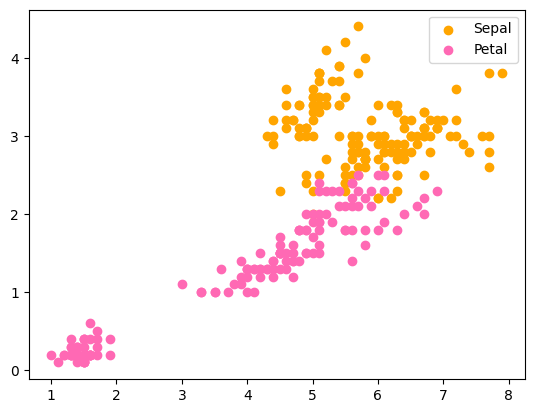

In [ ]:
 #Plot the data points
plt.scatter(c1, c2, color='orange', label='Sepal')
plt.scatter(c3, c4, color='hotpink', label='Petal')
plt.legend()
plt.show()




In [ ]:
# Create the feature matrix X
X = np.array(list(zip(c1, c2, c3, c4)))

# Initial cluster centroids
c1 = [X[0][0], X[1][0], X[2][0]]
c2 = [X[0][1], X[1][1], X[2][1]]
c3 = [X[0][2], X[1][2], X[2][2]]
c4 = [X[0][3], X[1][3], X[2][3]]
c = np.array(list(zip(c1, c2, c3, c4)), dtype=np.float32)

# Define a function to calculate Euclidean distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

c_old = np.zeros(c.shape)  # Placeholder for old centroids

clusters = np.zeros(len(X))  # Placeholder for cluster assignments

error = dist(c, c_old, None)  # Initial error (distance between centroids)
while error != 0:

    # Assign data points to nearest cluster centroid
    for i in range(len(X)):
        distances = dist(X[i], c)
        cluster = np.argmin(distances)
        clusters[i] = cluster

    c_old = deepcopy(c)  # Store the current centroids

    # Update cluster centroids by calculating the mean of data points in each cluster
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        c[i] = np.mean(points, axis=0)

    error = dist(c, c_old, None)  # Calculate the new error (distance between new and old centroids)

print(c)  # Print the final cluster centroids
print(clusters)  # Print the assigned clusters for each data point
print(error)  # Print the final error

[[6.853846  3.0769231 5.7153845 2.0538461]
 [5.8836064 2.7409837 4.3885245 1.4344262]
 [5.006     3.418     1.464     0.244    ]]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1.]
0.0


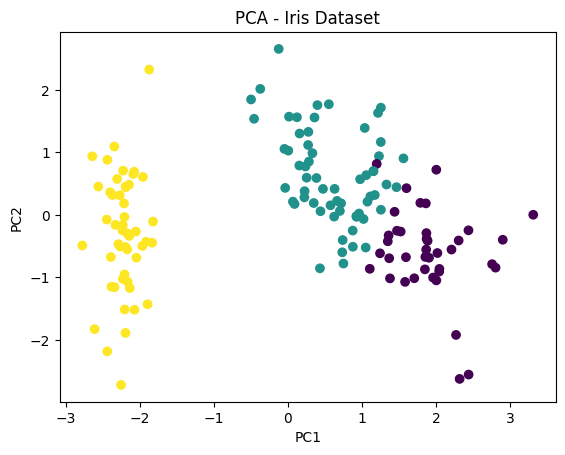

In [ ]:

# Standardize the features
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std

# Compute the covariance matrix
cov_matrix = np.cov(X_standardized.T)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and select top-k eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
top_k_indices = sorted_indices[:k]
W = eigenvectors[:, top_k_indices]

# Project the standardized data onto the principal components
X_pca = np.dot(X_standardized, W)

# Remaining clustering code...

# Plot the data points in the transformed space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Iris Dataset')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
